# Loan Application Status Prediction

## DATA COLLECTION

In [1]:
#import all the basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data file and printing the first 10 columns
df=pd.read_csv('Loandata.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#Displaying the bottom 10 rows of the data set
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In our data set we can see that the Dependent variable is Categorical nominal type and has 2 class so we can say that Our problem is Linear Regression Type 

In [4]:
#Displaying the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We can see that there are 12 Independent Variable  and Our Dependent Variable is Laon_Status And we have 614 records

In [5]:
#Displaying the number of rows and columns
df.shape

(614, 13)

We have 13 Variable with 614 Records

In [6]:
#Displaying the data types of each columns
data_typ=df.dtypes
data_typ

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that the we have variable with object type, interger and float type

In [7]:
#Counting the number of data types repeated
data_typ.value_counts()

object     8
float64    4
int64      1
dtype: int64

From Above we can see that we have 8 variable with object type and 4 variable with float type and 1 variable with integer type 

In [8]:
#Checking wheather null value is present or not
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have got some missing values 

1.   Gender has 13 mising value
2.   Married has 3 mising value
3.   Dependents has 15 mising value
4.   Self_Employed has 32 mising value
5.   LoanAmount has 22 missing values
6.   Loan_Amount_Term has 14 missing values
7.   Credit_History has 14 missing values 



In [9]:
#Checking the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From above we can see that how many columns has null value and the data type of each variable and much more 

In [10]:
#checking the min max and unique value present in numerical column
for i in df.columns:
  if df[i].dtype != 'object':
    print(f'====== column : {i} ===== \n')
    print(f'Max : {df[i].max()} ')
    print(f'Min : {df[i].min()} \n')
    print(f'Number of unique value present : {df[i].nunique()} \n\n\n')

====== column : ApplicantIncome ===== 

Max : 81000 
Min : 150 

Number of unique value present : 505 



====== column : CoapplicantIncome ===== 

Max : 41667.0 
Min : 0.0 

Number of unique value present : 287 



====== column : LoanAmount ===== 

Max : 700.0 
Min : 9.0 

Number of unique value present : 203 



====== column : Loan_Amount_Term ===== 

Max : 480.0 
Min : 12.0 

Number of unique value present : 10 



====== column : Credit_History ===== 

Max : 1.0 
Min : 0.0 

Number of unique value present : 2 





We can see the maxinum and minimum of each variable and also the unique value present in each variable  

In [11]:
#checking the values count and number of unique count in categorical column

for i in df.columns:
  if df[i].dtype == 'object':
    print(f'====== column : {i} ===== \n')
    print(f'Number of unique element : {df[i].nunique()} ')
    print(f'Unique element and their frequency are as follows : \n {df[i].value_counts()} \n\n\n')


====== column : Loan_ID ===== 

Number of unique element : 614 
Unique element and their frequency are as follows : 
 LP001665    1
LP002959    1
LP002892    1
LP002100    1
LP002877    1
           ..
LP001560    1
LP002114    1
LP001552    1
LP001634    1
LP002187    1
Name: Loan_ID, Length: 614, dtype: int64 



====== column : Gender ===== 

Number of unique element : 2 
Unique element and their frequency are as follows : 
 Male      489
Female    112
Name: Gender, dtype: int64 



====== column : Married ===== 

Number of unique element : 2 
Unique element and their frequency are as follows : 
 Yes    398
No     213
Name: Married, dtype: int64 



====== column : Dependents ===== 

Number of unique element : 4 
Unique element and their frequency are as follows : 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 



====== column : Education ===== 

Number of unique element : 2 
Unique element and their frequency are as follows : 
 Graduate        480
Not Gra

From above we can see the Number of unique element in categorical column with their fequency 

In [12]:
#checking the statistical information of our numerical variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


We can see from the above table that the difference between the mean and 50% is more that means that there is skewnes is present 
we can see that the difference between (min and 25%) and (max and 50%) is more which means that the outlier is present 

In [13]:
#checking the statistical information of our categorical variable
df.describe(include='object').T

,count,unique,top,freq
Loan_ID,614,614,LP001665,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


We can see which calss in each variable has the highest frequency

# Univariate analysis

In [14]:
#storing the numerical and categorical value separately
num_col=[]
cat_col=[]
for i in df.columns:
  if df[i].dtype == 'object':
    cat_col.append(i)
  else:
    num_col.append(i)
print('Numerical column : ',num_col,'\n')
print('Categorical column : ',cat_col)

Numerical column :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 

Categorical column :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


We can see that I have stored nummerical variable and categorical variable separately

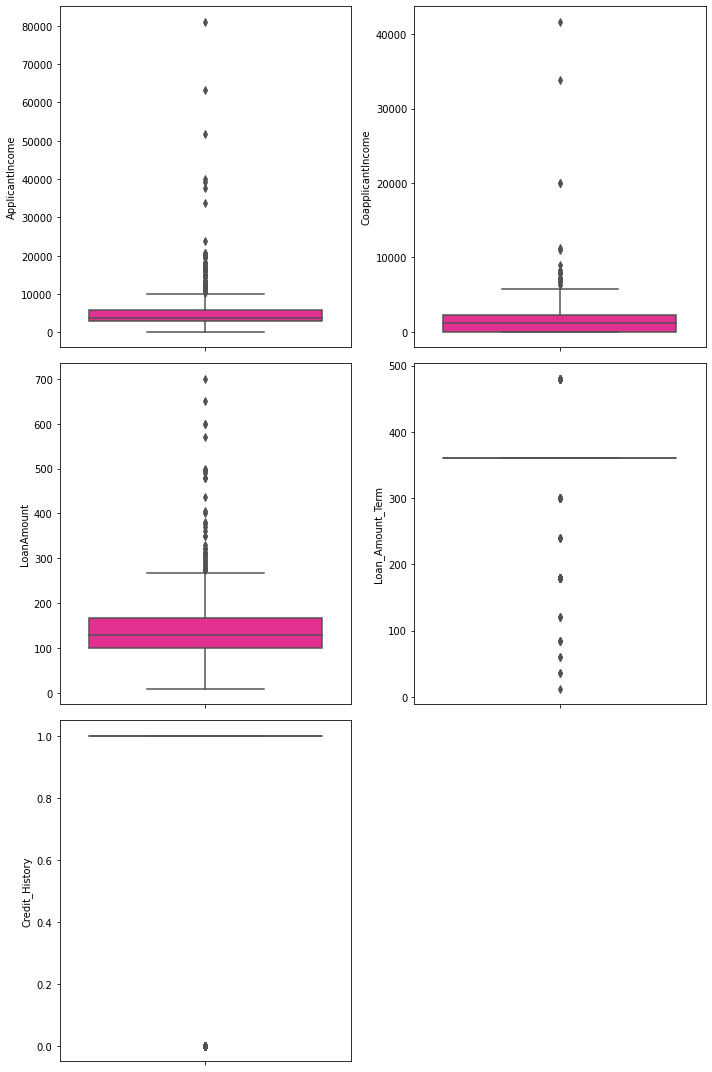

In [15]:
#ploting the box plot for the numerical data set 
plt.figure(figsize=(10,15))
for i,col in enumerate(num_col):
  plt.subplot(3,2,i+1)
  sn.boxplot(y=col,color='deeppink',data=df)
  plt.tight_layout()

From above boxplot we can see that the outlier is present in all the variable

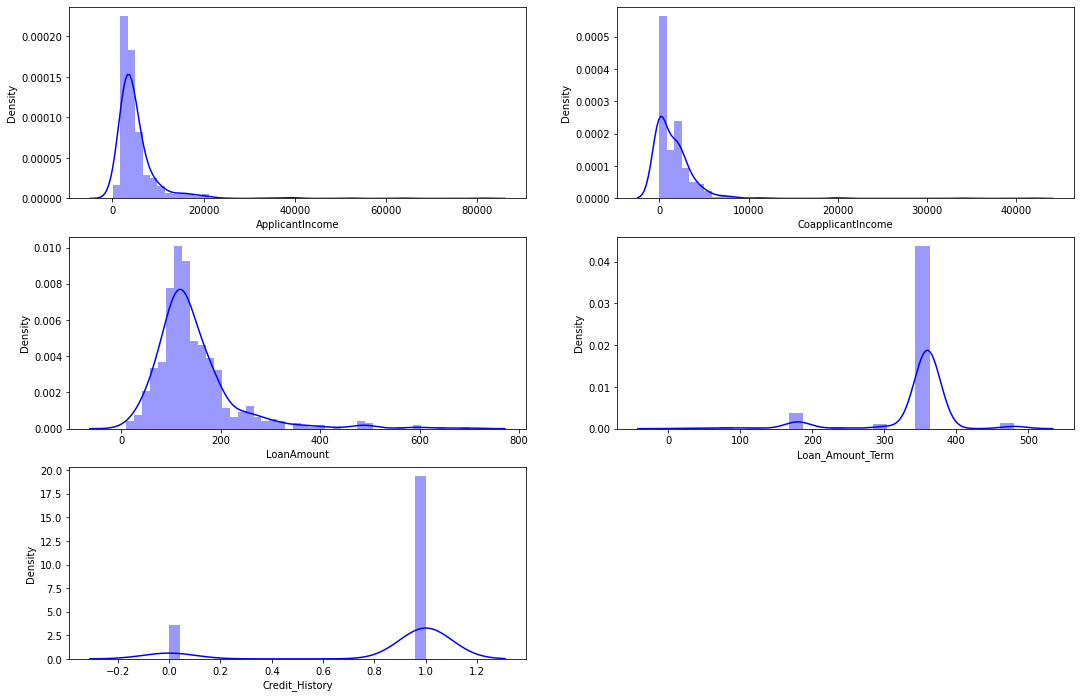

In [16]:
#ploting the dist plot for the numerical data set 
plt.figure(figsize=(18,12))
for i,col in enumerate(num_col):
  plt.subplot(3,2,i+1)
  sn.distplot(df[col],color='b');

We can see that Skewness is present in all the numerical variable and it has to be treated before building the model 

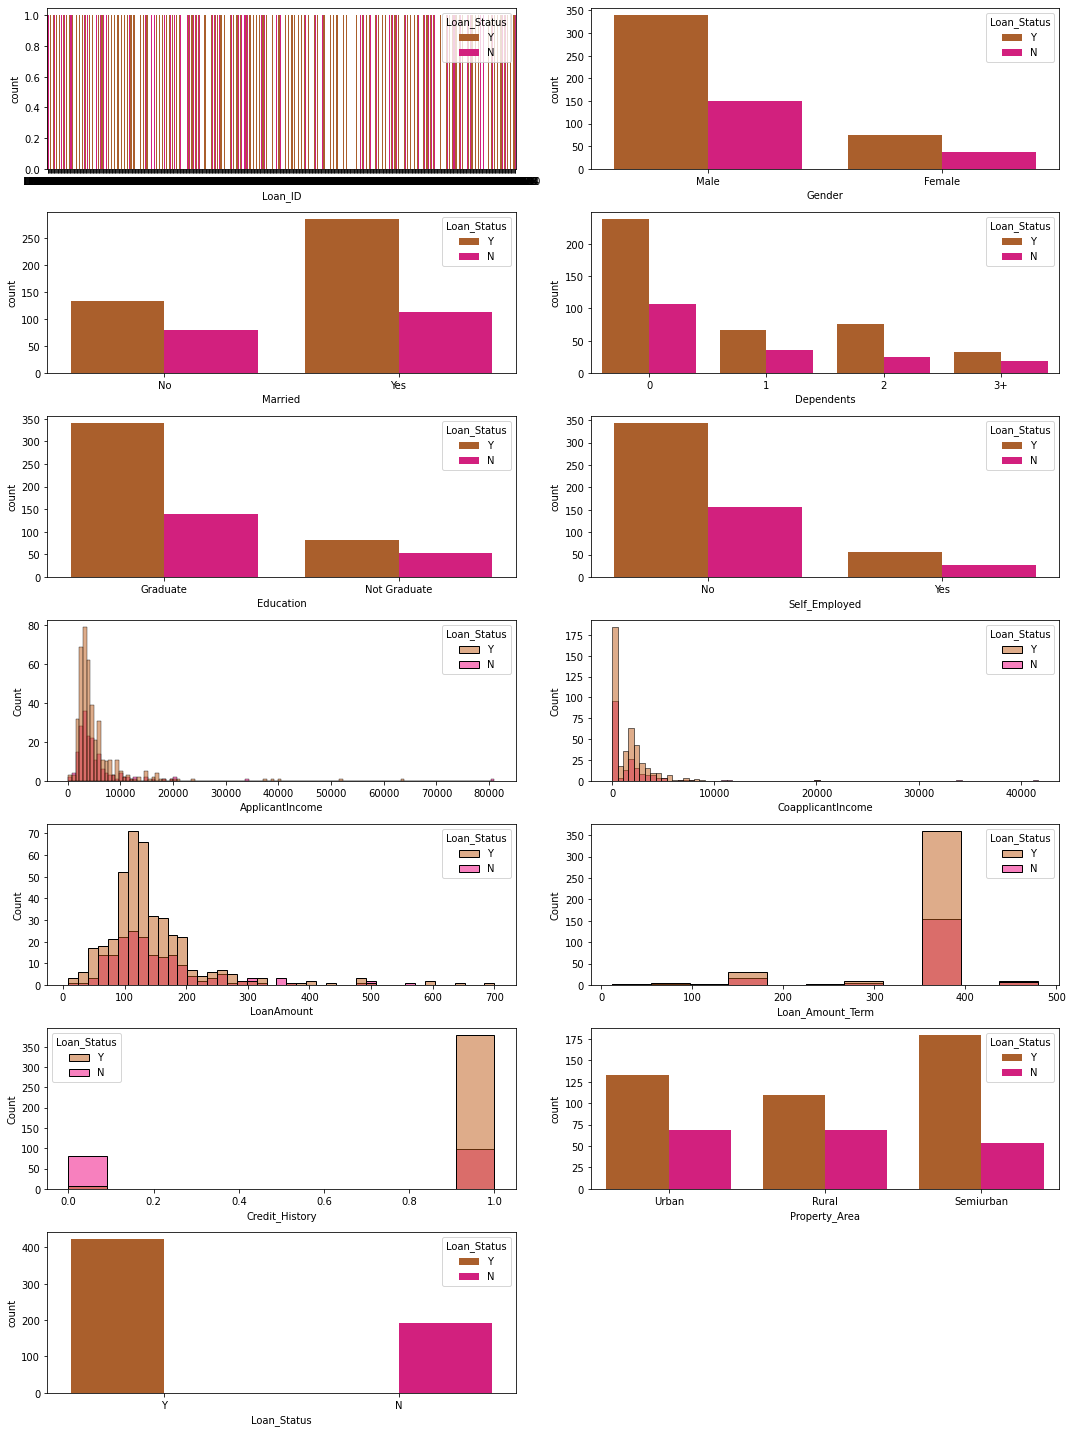

In [17]:
#ploting the count plot and his graph 
sn.set_palette('Accent_r')
plt.figure(figsize=(15,20))
for i,col in enumerate(df.columns):
  plt.subplot(7,2,i+1)
  if df[col].dtype == 'object':
    sn.countplot(x=col,hue='Loan_Status',data=df)
    plt.tight_layout()
  else:
    sn.histplot(x=col,hue='Loan_Status',data=df)
    plt.tight_layout()

From the above columns we can see that getting loan is likely to happen 

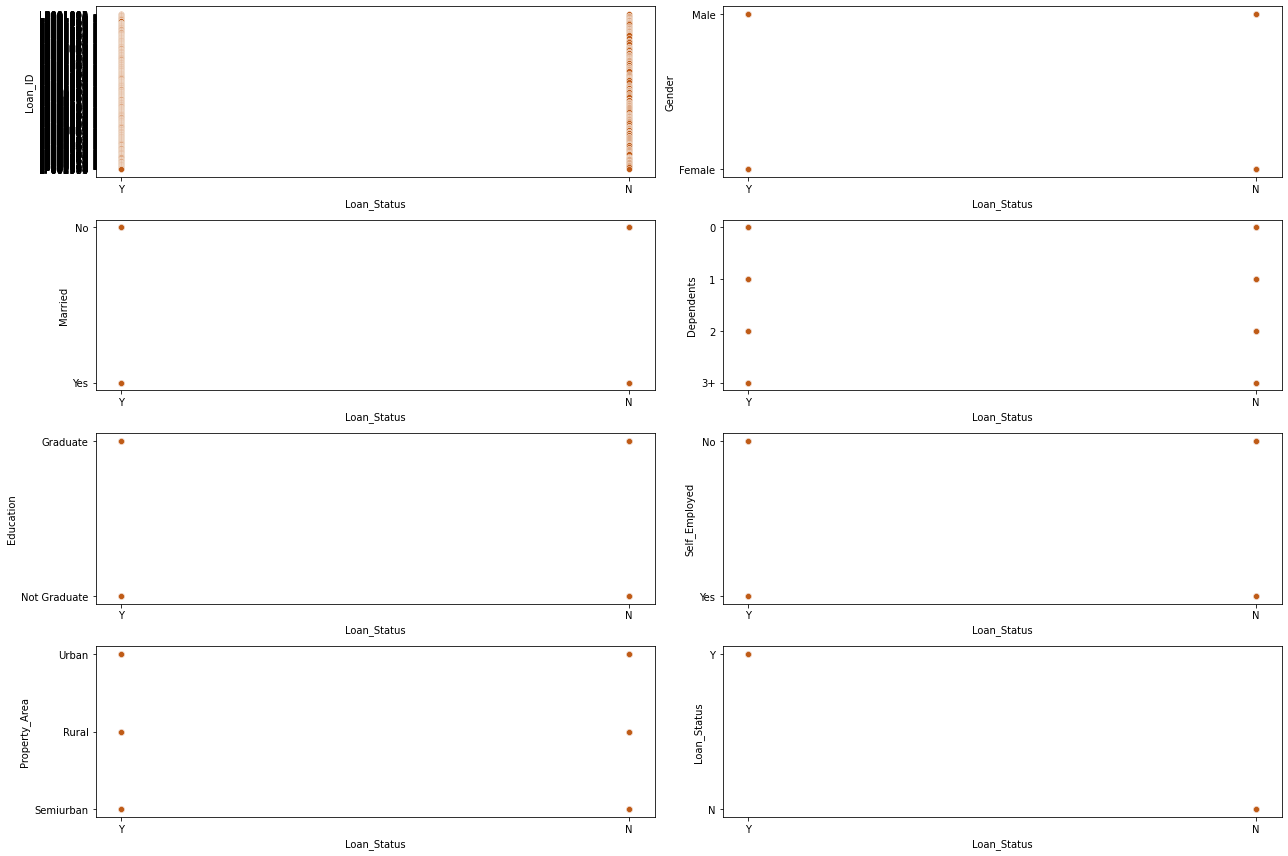

In [18]:
#ploting the scatter plot for the numerical data set 
plt.figure(figsize=(18,12))
for i,col in enumerate(cat_col):
  plt.subplot(4,2,i+1)
  sn.scatterplot(x='Loan_Status',y=col,data=df)
  plt.tight_layout()

We can see that we ca unable to draw the sigmoid function curve with any of our independent variable with the dependent variable.

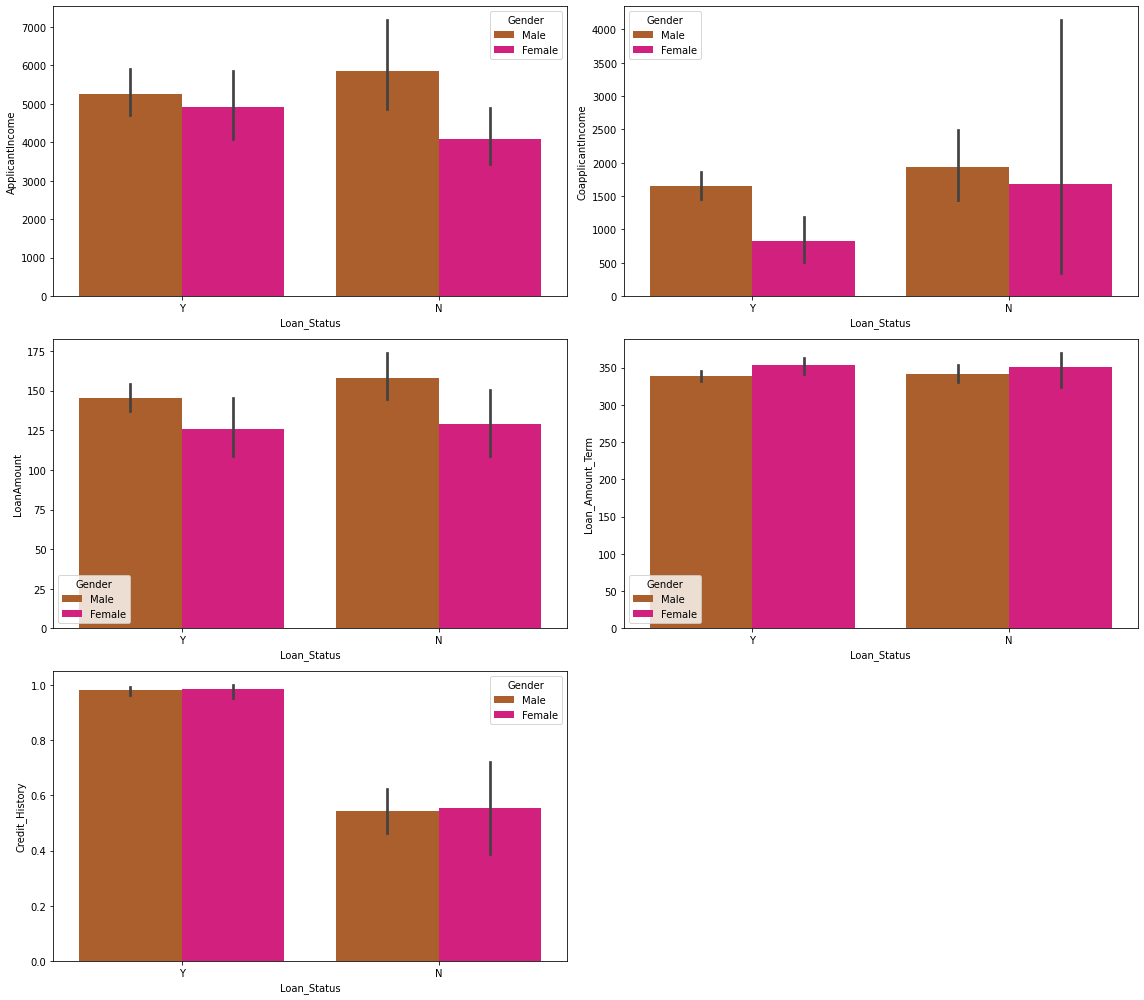

In [19]:
#ploting the bar plot for the numerical data set 
plt.figure(figsize=(16,14))
for i,col in enumerate(num_col):
  plt.subplot(3,2,i+1)
  sn.barplot(x='Loan_Status',y=col,hue='Gender',data=df)
  plt.tight_layout()



1.   We can see that male/female application is likely to get loan if credit score is 1
2.   If the applicant is male he is likely to get the loan.



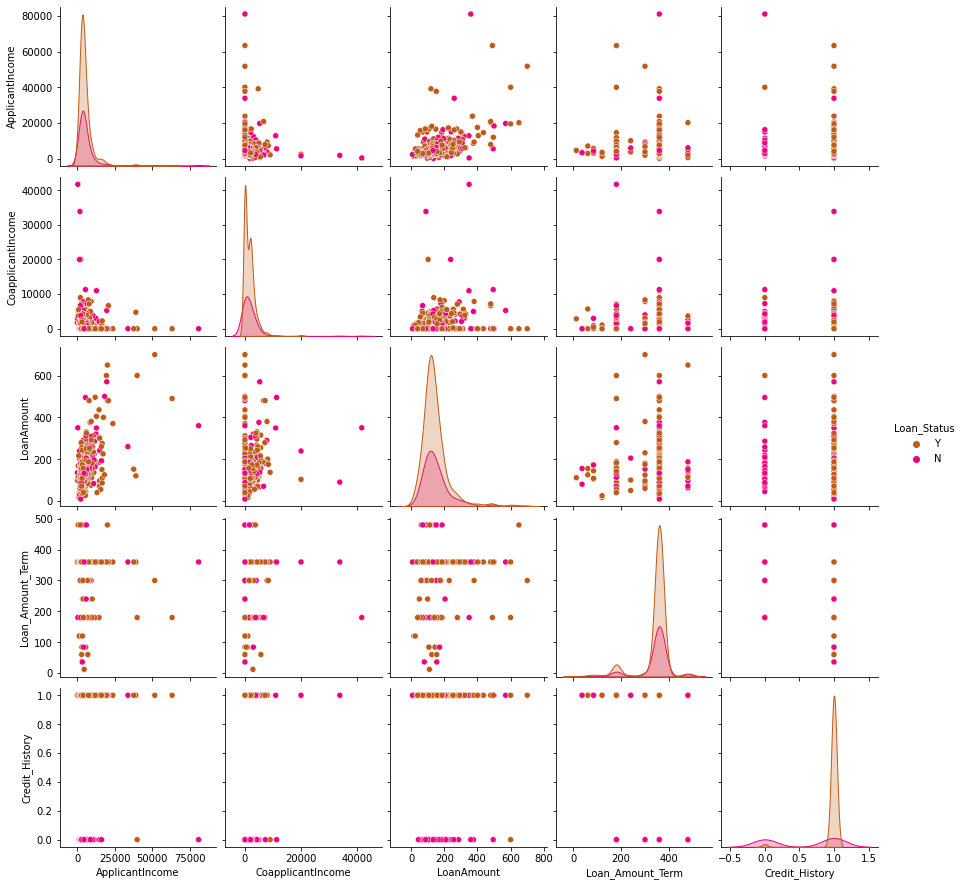

In [20]:
#plotting the pair plot to our data
sn.pairplot(df,hue='Loan_Status')

We can see that the cluster cannot be separated with a straight line or a plane so its unlikey that the accuracy from linear modle would be more but we can be using the othe classification model

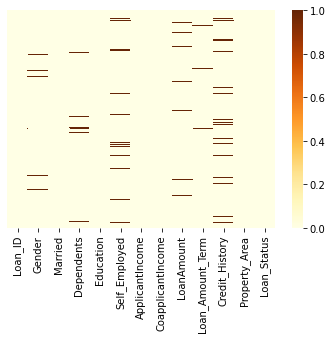

In [21]:
#ploting the heat map to see wheather null value is present or not 
sn.heatmap(df.isnull(),yticklabels=False,cmap='YlOrBr');

We can see that the missing value is present in our data set

In [22]:
#Lets see the corelation between each variable
df_co=df.corr()
df_co

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


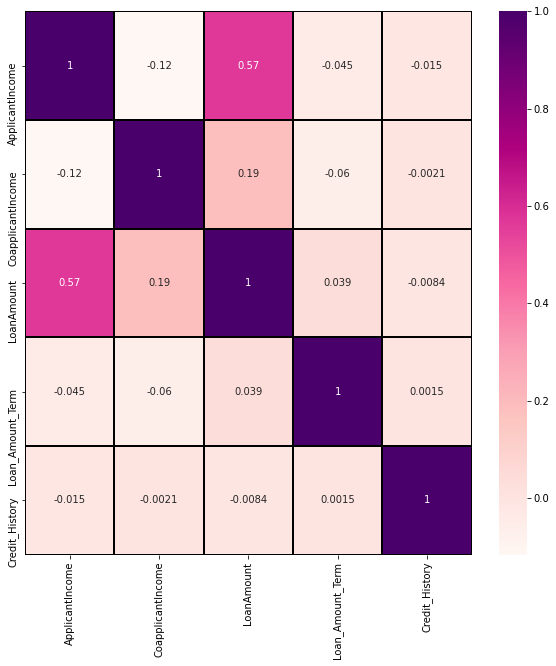

In [23]:
#Lets plot the heat map for above table
plt.figure(figsize=(10,10))
sn.heatmap(df_co,annot=True,cmap='RdPu',linewidth=1,linecolor='black');

We can see the corelation between the numerical variable and we can see that none of the have good corelation with each other

# Data cleaning

In [24]:
#droping the Loan ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

Loan ID is unique for all the records so we can drop the column

In [25]:
#replacing the 3+ value by 4
df['Dependents'].replace('3+','4',inplace=True)

In dependent column we have 3+ which means dependency is more than 3 so I am rounding it off to 4

In [26]:
#Filling the missing value
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

I have replaced the nan value in categorical value by mode and nan value in numerical value by median  

In [27]:
#Checking wheather we have missed filling any missing value
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that there are no null value present now

In [28]:
#replacing dependent variable by 0 and 1
df['Loan_Status']=df['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

I am converting the Dependent variable into numerical by replacing the Y with 1 and 0 with N

In [29]:
#encoding the numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=le.fit_transform(df[i])

We have converted all our categirical values into numerical form

In [30]:
#Making the copy of our data set for emergency
df1=df.copy()

In [31]:
#checking wheather I can remove outlier or not by z score method
from scipy.stats import zscore
z=np.abs(zscore(df1))
df1=df1[(z<3).all(axis=1)]
print("Before removing outliers:",df.shape)
print("After removing outliers:",df1.shape)
p=100-(len(df1.index)/len(df.index)*100)
print(f'We are lossing {p} % of data.')

Before removing outliers: (614, 12)
After removing outliers: (577, 12)
We are lossing 6.026058631921828 % of data.


We can see that we are loosing about 6% of data as ours is small data set I would **not be removing the outlier**

In [32]:
#Spliting the independent and dependent variable separately
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [33]:
#removing the skewness in our data set by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [34]:
#scaling our data set 
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [35]:
#apply over sampling to handel class imbalance in our dependent variable
from imblearn.over_sampling import SMOTE
ovs=SMOTE()
x_over,y_over=ovs.fit_resample(x,y)
print(x_over.shape,'\n')
print(y_over.shape)

(844, 11) 

(844,)


I have used the over sample as our data set is small


# Best random state

In [36]:
#Selecting the best random state
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

acc=0
ran=0
for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=i)
  mod=RandomForestClassifier()
  mod.fit(x_train,y_train)
  pred=mod.predict(x_test)
  ass=accuracy_score(y_test,pred)
  if ass>acc:
    acc=ass
    ran=i
print("Best accuracy is ",acc,' on Random State ',ran)

Best accuracy is  0.8720379146919431  on Random State  18


# Building the model

In [37]:
#building model using the Random Forest,Logistic Regression , Decision Tree classifier, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
#spliting the data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=18)

In [39]:
#building the model
model={'LogisticRegression':LogisticRegression(), 'DecisionTreeClassifier':DecisionTreeClassifier(),'RandomForestClassifier':RandomForestClassifier(), 'SVC':SVC(),}

accscore=[]
crossvalidation=[]
for key, value in model.items():
  print("===== ",key,' model ===== ')
  value.fit(x_train,y_train)
  pred=value.predict(x_test)
  accs=accuracy_score(y_test,pred)
  print("Accuracy Score is ",accs,'\n')
  accscore.append(accs)
  cm=confusion_matrix(y_test,pred)
  print('confusion Matrix \n',cm,'\n')
  cr=classification_report(y_test,pred)
  print('Classification Report',cr)

  c=cross_val_score(value,x_over,y_over,cv=5)
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  print('\n\n\n')

=====  LogisticRegression  model ===== 
Accuracy Score is  0.7535545023696683 

confusion Matrix 
 [[ 56  39]
 [ 13 103]] 

Classification Report               precision    recall  f1-score   support

           0       0.81      0.59      0.68        95
           1       0.73      0.89      0.80       116

    accuracy                           0.75       211
   macro avg       0.77      0.74      0.74       211
weighted avg       0.76      0.75      0.75       211

Cross validation score is 0.7073541842772613 





=====  DecisionTreeClassifier  model ===== 
Accuracy Score is  0.7772511848341233 

confusion Matrix 
 [[78 17]
 [30 86]] 

Classification Report               precision    recall  f1-score   support

           0       0.72      0.82      0.77        95
           1       0.83      0.74      0.79       116

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211

Cro

In [40]:
#selecting the best model from the above model
Modelselection=pd.DataFrame({})
Modelselection['Model_Name']=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 'SVC',]
Modelselection['Accuracy Score']=accscore
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of Acc_Score and Cross_Val']=abs(Modelselection['Accuracy Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,Accuracy Score,Cross Validation,Diff of Acc_Score and Cross_Val
0,LogisticRegression,0.753555,0.707354,0.046200
1,DecisionTreeClassifier,0.777251,0.785644,0.008393
2,RandomForestClassifier,0.862559,0.821210,0.041349
3,SVC,0.772512,0.716871,0.055641


We have got Random Foresr Classifier with High accuracy of 86% with low variance of 4% So carrying out the Hyper parameter tuning on Random Foresr Classifier Model

In [42]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p1={'max_depth':np.arange(1,25,5), 'oob_score':[2,4,6], 'class_weight':['balanced','balanced_subsample']}
p2={'n_estimators':np.arange(2,10,2), 'criterion':['gini','entropy'], 'min_samples_split':[6,4] }
p3={'max_features':['auto','sqrt'],'criterion': ['gini','entropy'],'max_depth':np.arange(2,20)}
p=[p1,p2,p3]

for i in p:
  rfc=RandomForestClassifier()
  gsc=GridSearchCV(rfc,i)
  gsc.fit(x_train,y_train)
  print(gsc.best_params_)

{'class_weight': 'balanced', 'max_depth': 16, 'oob_score': 2}
{'criterion': 'entropy', 'min_samples_split': 6, 'n_estimators': 8}
{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}


We have got 3 sets of best parameter and we will build the model using the best parameter 

In [43]:
mod_1=RandomForestClassifier(class_weight='balanced',max_depth=16,oob_score=2)
mod_1.fit(x_train,y_train)
pred=mod_1.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(mod_1,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean())

Accuracy Score is  0.8720379146919431 

confusion Matrix 
 [[ 80  15]
 [ 12 104]] 

Classification Report               precision    recall  f1-score   support

           0       0.87      0.84      0.86        95
           1       0.87      0.90      0.89       116

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211

Cross validation score is 0.8365948154409694


In [44]:
mod_2=RandomForestClassifier(criterion='entropy',min_samples_split=6,n_estimators=8)
mod_2.fit(x_train,y_train)
pred=mod_2.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(mod_2,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean())

Accuracy Score is  0.8151658767772512 

confusion Matrix 
 [[77 18]
 [21 95]] 

Classification Report               precision    recall  f1-score   support

           0       0.79      0.81      0.80        95
           1       0.84      0.82      0.83       116

    accuracy                           0.82       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.82      0.82      0.82       211

Cross validation score is 0.8021625810087348


In [45]:
mod_2=RandomForestClassifier(criterion='gini',max_depth=15,max_features='auto')
mod_2.fit(x_train,y_train)
pred=mod_2.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(mod_2,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean())

Accuracy Score is  0.8672985781990521 

confusion Matrix 
 [[ 77  18]
 [ 10 106]] 

Classification Report               precision    recall  f1-score   support

           0       0.89      0.81      0.85        95
           1       0.85      0.91      0.88       116

    accuracy                           0.87       211
   macro avg       0.87      0.86      0.86       211
weighted avg       0.87      0.87      0.87       211

Cross validation score is 0.8211890673429135


We can see that there is improvenment in our model by 1%

> So our best modle is mod1 with 87% accuray with low variance 4% Lets plot the ROC AUC CURVE for that



In [46]:
#plotting roc_auc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=mod_1.predict_proba(x_test)[:,1]
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

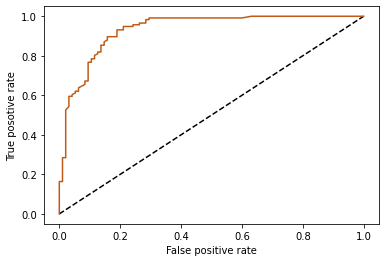

auc_score :  0.8693284936479129


In [47]:
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.show()
auc_score=roc_auc_score(y_test,mod_1.predict(x_test))
print('auc_score : ',auc_score)



> ** Best model : mod_1 **

> ** accuracy_score: 87% **

> ** vriance : 4% **

> ** AUC score 86% ** 


# Saving the model 

In [48]:
import joblib
joblib.dump(mod_1,'FinalModel.pk1')

['FinalModel.pk1']